In [1]:
#Data Analysis
import pandas as pd
import numpy as np
# Modeling
import statsmodels.api as sm
from pygam import GAM, ExpectileGAM, s, f
from sklearn.preprocessing import LabelEncoder
# Visualization
import plotly.express as px
from plotnine import *
import pytimetk as tk
import textwrap 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('expanded_comp_full.xlsx')

In [3]:
df = df[df['type de chambre'] == 'double']

In [35]:
df

,Hotel_id,devise,Date,Prix,type de chambre
3786,310,TND,2025-07-07,418.200,double
3787,310,TND,2025-07-08,372.300,double
3788,310,TND,2025-07-09,408.000,double
3789,310,TND,2025-07-10,418.200,double
3790,310,TND,2025-07-11,409.700,double
...,...,...,...,...,...
7567,341,TND,2026-07-03,982.141,double
7568,341,TND,2026-07-04,1002.507,double
7569,341,TND,2026-07-05,1002.507,double
7570,341,TND,2026-07-06,982.141,double


In [36]:
df.to_excel('alim_fact_comp_double.xlsx', index=False)

In [5]:
BH = pd.read_excel('Full_BH.xlsx')

In [6]:
BH

,arrival day,type de chambre,booking lead,is-week-end,res day,season,arr month,arr day,is_promo,taux occ arr,...,rev__q0.025,rev__q0.5,rev__q0.975,rev__q0.025_m,rev__q0.5_m,rev__0.975_m,taux occ res,best_50,best_025,best_975
0,2024-01-01,single,90,False,2023-10-03,winter,1,1,True,0.36,...,81961.600450,101825.926628,121818.882022,90890.448112,111088.488031,135951.272189,0.000000,577.73,577.73,577.73
1,2024-01-01,family,90,False,2023-10-03,winter,1,1,False,0.36,...,114796.940013,143096.906313,163213.034642,100582.169294,124729.706212,151601.211105,0.000000,1394.84,1395.26,1390.99
2,2024-01-01,family,90,False,2023-10-03,winter,1,1,False,0.36,...,114796.940013,143096.906313,163213.034642,100582.169294,124729.706212,151601.211105,0.000000,1394.84,1395.26,1390.99
3,2024-01-01,single,89,False,2023-10-04,winter,1,1,True,0.36,...,80420.698270,98005.181338,115688.902034,90890.448112,111088.488031,135951.272189,0.002500,577.73,577.73,577.73
4,2024-01-01,double,89,False,2023-10-04,winter,1,1,True,0.36,...,110804.566772,137311.140656,162785.649719,113740.414807,139546.457794,171209.614046,0.000000,981.60,991.75,981.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455242,2026-07-07,single,3,False,2026-07-04,summer,7,7,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.771171,577.73,577.73,577.73
455243,2026-07-07,single,3,False,2026-07-04,summer,7,7,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.778378,577.73,577.73,577.73
455244,2026-07-07,single,2,False,2026-07-05,summer,7,7,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.785586,577.73,577.73,577.73
455245,2026-07-07,single,0,False,2026-07-07,summer,7,7,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.792793,577.73,577.73,577.73


In [7]:
# Convertir la colonne "Date" au format datetime
df['Date'] = pd.to_datetime(df['Date'])

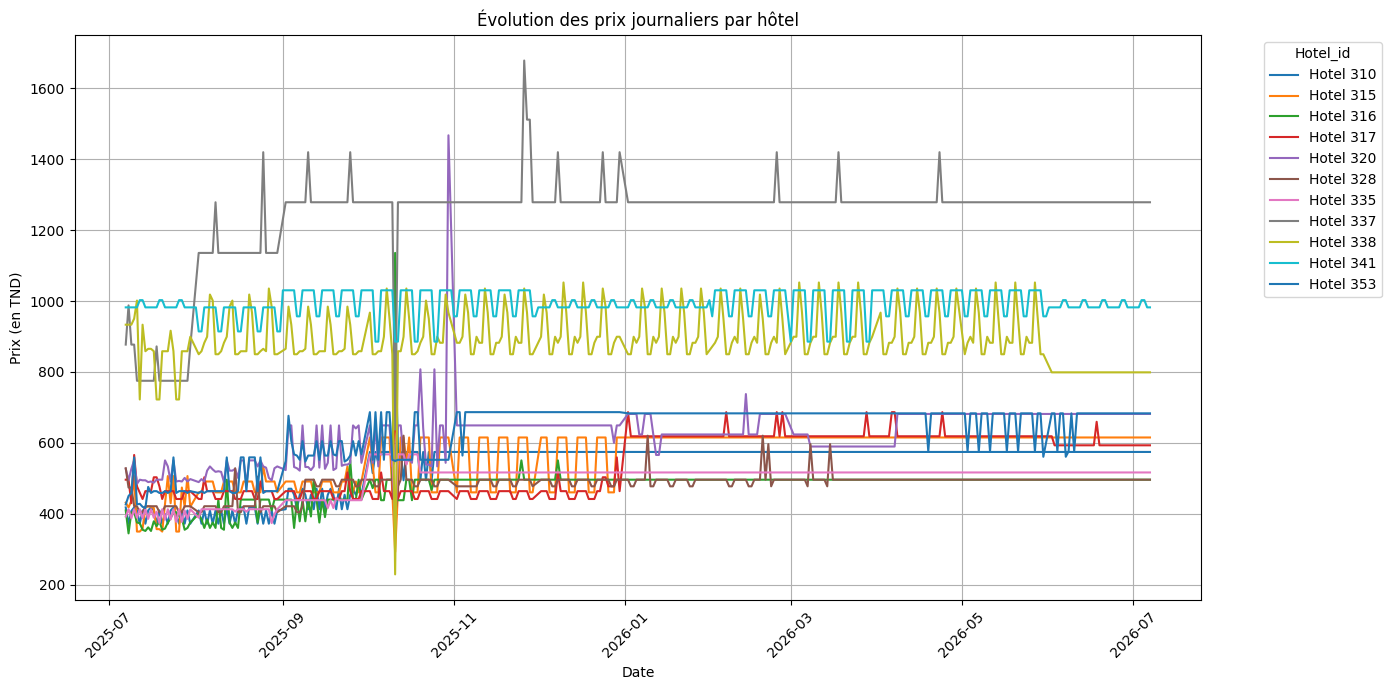

In [8]:
# Créer le graphique
plt.figure(figsize=(14, 7))

# Tracer une courbe par hôtel
for hotel_id, group in df.groupby('Hotel_id'):
    plt.plot(group['Date'], group['Prix'], label=f'Hotel {hotel_id}')

# Mise en forme du graphique
plt.title("Évolution des prix journaliers par hôtel")
plt.xlabel("Date")
plt.ylabel("Prix (en TND)")
plt.legend(title="Hotel_id", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# Créer un graphique interactif
fig = px.line(df,
              x='Date',
              y='Prix',
              color='Hotel_id',
              title="Évolution interactive des prix par hôtel",
              labels={'Prix': 'Prix (TND)', 'Date': 'Date'},
              hover_data={'Hotel_id': True, 'Prix': True, 'Date': True})

# Afficher le graphique
fig.update_layout(
    legend_title_text='Hotel ID',
    hovermode='x unified',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Prix (TND)'),
)

fig.write_html("graphique_interactif.html", auto_open=True)


In [12]:
filtered_df1 = df[df['Date'].dt.month.isin([2, 3, 4])]

In [14]:
# Créer un graphique interactif
fig = px.line(filtered_df1,
              x='Date',
              y='Prix',
              color='Hotel_id',
              title="Évolution interactive des prix par hôtel",
              labels={'Prix': 'Prix (TND)', 'Date': 'Date'},
              hover_data={'Hotel_id': True, 'Prix': True, 'Date': True})

# Afficher le graphique
fig.update_layout(
    legend_title_text='Hotel ID',
    hovermode='x unified',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Prix (TND)'),
)

fig.write_html("graphique_interactif.html", auto_open=True)

In [10]:
df_my_hotel = df[df['Hotel_id'] == 341]

In [11]:
df_my_hotel

,Hotel_id,devise,Date,Prix,type de chambre
7206,341,TND,2025-07-07,982.141,double
7207,341,TND,2025-07-08,982.141,double
7208,341,TND,2025-07-09,982.141,double
7209,341,TND,2025-07-10,982.141,double
7210,341,TND,2025-07-11,982.141,double
...,...,...,...,...,...
7567,341,TND,2026-07-03,982.141,double
7568,341,TND,2026-07-04,1002.507,double
7569,341,TND,2026-07-05,1002.507,double
7570,341,TND,2026-07-06,982.141,double


In [12]:
df_comp = df[df['Hotel_id'] != 341]

In [34]:
df_comp

,Hotel_id,devise,Date,Prix,type de chambre
3786,310,TND,2025-07-07,418.2,double
3787,310,TND,2025-07-08,372.3,double
3788,310,TND,2025-07-09,408.0,double
3789,310,TND,2025-07-10,418.2,double
3790,310,TND,2025-07-11,409.7,double
...,...,...,...,...,...
7201,353,TND,2026-07-03,683.4,double
7202,353,TND,2026-07-04,683.4,double
7203,353,TND,2026-07-05,683.4,double
7204,353,TND,2026-07-06,683.4,double


In [13]:
results = []

alpha = 0.05
threshold_ans = 0.3
x = 0.10  # 10% deviation allowed

In [14]:
# Define current reservation day
res_day = pd.to_datetime("2025-07-07")

In [15]:
# Ensure proper datetime formats
df_my_hotel['Date'] = pd.to_datetime(df_my_hotel['Date'])
BH['res day'] = pd.to_datetime(BH['res day'])
BH['arrival day'] = pd.to_datetime(BH['arrival day'])

In [16]:
# Add the constant reservation day to df_my_hotel to prepare for join
df_my_hotel['res day'] = res_day
df_my_hotel['arrival day'] = df_my_hotel['Date']  # to match with BH

In [17]:
df_my_hotel

,Hotel_id,devise,Date,Prix,type de chambre,res day,arrival day
7206,341,TND,2025-07-07,982.141,double,2025-07-07,2025-07-07
7207,341,TND,2025-07-08,982.141,double,2025-07-07,2025-07-08
7208,341,TND,2025-07-09,982.141,double,2025-07-07,2025-07-09
7209,341,TND,2025-07-10,982.141,double,2025-07-07,2025-07-10
7210,341,TND,2025-07-11,982.141,double,2025-07-07,2025-07-11
...,...,...,...,...,...,...,...
7567,341,TND,2026-07-03,982.141,double,2025-07-07,2026-07-03
7568,341,TND,2026-07-04,1002.507,double,2025-07-07,2026-07-04
7569,341,TND,2026-07-05,1002.507,double,2025-07-07,2026-07-05
7570,341,TND,2026-07-06,982.141,double,2025-07-07,2026-07-06


In [18]:
#change the given infos to parameter(these parameters should be selected by the user)
data_filtered = (
    BH[
        (BH['type de chambre'] == 'double')
    ]
    .drop_duplicates(subset=['arrival day', 'res day'], keep='first')
)


X1 = data_filtered[['paid price']]
y1= data_filtered['nbre res']

print(len(X1)) 

65408


In [19]:
# Then perform the merge as before, but on the filtered version
df_merged3 = pd.merge(
    df_my_hotel,
    data_filtered[['res day', 'arrival day', 'taux occ res']],
    on=['arrival day','res day'],
    how='left'
)

In [20]:
df_merged3

,Hotel_id,devise,Date,Prix,type de chambre,res day,arrival day,taux occ res
0,341,TND,2025-07-07,982.141,double,2025-07-07,2025-07-07,0.790361
1,341,TND,2025-07-08,982.141,double,2025-07-07,2025-07-08,0.784615
2,341,TND,2025-07-09,982.141,double,2025-07-07,2025-07-09,0.749650
3,341,TND,2025-07-10,982.141,double,2025-07-07,2025-07-10,0.755200
4,341,TND,2025-07-11,982.141,double,2025-07-07,2025-07-11,0.731707
...,...,...,...,...,...,...,...,...
361,341,TND,2026-07-03,982.141,double,2025-07-07,2026-07-03,NaN
362,341,TND,2026-07-04,1002.507,double,2025-07-07,2026-07-04,NaN
363,341,TND,2026-07-05,1002.507,double,2025-07-07,2026-07-05,NaN
364,341,TND,2026-07-06,982.141,double,2025-07-07,2026-07-06,NaN


In [21]:
num_nans = df_merged3['taux occ res'].isna().sum()

In [22]:
num_nans

294

In [23]:
# Count how many NaNs we have
n_missing = df_merged3['taux occ res'].isna().sum()

# Generate random values between 0 and 0.8
random_values = np.random.uniform(0, 0.8, size=n_missing)

# Fill NaNs with these random values
df_merged3.loc[df_merged3['taux occ res'].isna(), 'taux occ res'] = random_values

In [24]:
n_missing

294

In [25]:
# Create 'booking lead' column (as number of days)
df_merged3['booking lead'] = (df_merged3['arrival day'] - df_merged3['res day']).dt.days

In [26]:
df_my_hotel=df_merged3.copy()

In [27]:
df_my_hotel

,Hotel_id,devise,Date,Prix,type de chambre,res day,arrival day,taux occ res,booking lead
0,341,TND,2025-07-07,982.141,double,2025-07-07,2025-07-07,0.790361,0
1,341,TND,2025-07-08,982.141,double,2025-07-07,2025-07-08,0.784615,1
2,341,TND,2025-07-09,982.141,double,2025-07-07,2025-07-09,0.749650,2
3,341,TND,2025-07-10,982.141,double,2025-07-07,2025-07-10,0.755200,3
4,341,TND,2025-07-11,982.141,double,2025-07-07,2025-07-11,0.731707,4
...,...,...,...,...,...,...,...,...,...
361,341,TND,2026-07-03,982.141,double,2025-07-07,2026-07-03,0.721791,361
362,341,TND,2026-07-04,1002.507,double,2025-07-07,2026-07-04,0.107564,362
363,341,TND,2026-07-05,1002.507,double,2025-07-07,2026-07-05,0.515021,363
364,341,TND,2026-07-06,982.141,double,2025-07-07,2026-07-06,0.501427,364


In [28]:
for date in df_my_hotel['Date'].unique():
    my_row = df_my_hotel[df_my_hotel['Date'] == date].iloc[0]
    occ = my_row['taux occ res']
    lead_time = my_row['booking lead']
    my_price = my_row['Prix']
    
    ans = (1 - occ) * np.exp(-alpha * lead_time)
    
    if ans >= threshold_ans:
        median_price = df_comp[df_comp['Date'] == date]['Prix'].median()
        pct_diff = (my_price - median_price) / median_price
        
        if abs(pct_diff) > x:
            # Determine if it's overprice or underprice
            if pct_diff > 0:
                new_price = 0.95 * median_price
                adjustment_type = "Overpriced"
            else:
                new_price = 1.05 * median_price
                adjustment_type = "Underpriced"
            
            results.append((date, my_price, median_price, new_price, adjustment_type))
        else:
            results.append((date, my_price, median_price, my_price, "OK"))
    else:
        results.append((date, my_price, None, my_price, "No Need"))

df_results = pd.DataFrame(results, columns=['date', 'my_price', 'median_price', 'suggested_price', 'action'])

In [29]:
df_results

,date,my_price,median_price,suggested_price,action
0,2025-07-07,982.141,NaN,982.141,No Need
1,2025-07-08,982.141,NaN,982.141,No Need
2,2025-07-09,982.141,NaN,982.141,No Need
3,2025-07-10,982.141,NaN,982.141,No Need
4,2025-07-11,982.141,NaN,982.141,No Need
...,...,...,...,...,...
361,2026-07-03,982.141,NaN,982.141,No Need
362,2026-07-04,1002.507,NaN,1002.507,No Need
363,2026-07-05,1002.507,NaN,1002.507,No Need
364,2026-07-06,982.141,NaN,982.141,No Need


In [69]:
num_nans = df_results['median_price'].isna().sum()

In [70]:
num_nans

364

In [30]:
for date in df_my_hotel['Date'].unique():
    my_row = df_my_hotel[df_my_hotel['Date'] == date].iloc[0]
    occ = my_row['taux occ res']
    lead_time = my_row['booking lead']
    my_price = my_row['Prix']
    
    ans = (1 - occ) * np.exp(-alpha * lead_time)
    median_price = df_comp[df_comp['Date'] == date]['Prix'].median()
    if ans >= threshold_ans:
        pct_diff = (my_price - median_price) / median_price
        
        if abs(pct_diff) > x:
            # Determine if it's overprice or underprice
            if pct_diff > 0:
                new_price = 0.95 * median_price
                adjustment_type = "Overpriced"
            else:
                new_price = 1.05 * median_price
                adjustment_type = "Underpriced"
            
            results.append((date, my_price, median_price, new_price, adjustment_type))
        else:
            results.append((date, my_price, median_price, my_price, "OK"))
    else:
        results.append((date, my_price, median_price, my_price, "No Need"))

df_results1 = pd.DataFrame(results, columns=['date', 'my_price', 'median_price', 'suggested_price', 'action'])

In [76]:
df_results1

,date,my_price,median_price,suggested_price,action
0,2025-07-07,577.73,NaN,577.73,No Need
1,2025-07-08,577.73,272.0,258.40,Overpriced
2,2025-07-09,577.73,NaN,577.73,No Need
3,2025-07-10,577.73,311.0,295.45,Overpriced
4,2025-07-11,577.73,NaN,577.73,No Need
...,...,...,...,...,...
1459,2026-07-03,577.73,355.5,577.73,No Need
1460,2026-07-04,589.71,355.5,589.71,No Need
1461,2026-07-05,589.71,355.5,589.71,No Need
1462,2026-07-06,577.73,355.5,577.73,No Need


In [78]:
for date in df_my_hotel['Date'].unique():
    my_row = df_my_hotel[df_my_hotel['Date'] == date].iloc[0]
    occ = my_row['taux occ res']
    lead_time = my_row['booking lead']
    my_price = my_row['Prix']

    # Calculate ANS regardless
    ans = (1 - occ) * np.exp(-alpha * lead_time)

    # ⬅️ Always calculate median price
    median_price = df_comp[df_comp['Date'] == date]['Prix'].median()

    if ans >= threshold_ans:
        pct_diff = (my_price - median_price) / median_price

        if abs(pct_diff) > x:
            if pct_diff > 0:
                # Overpriced → suggest price decrease
                new_price = 0.95 * median_price
                adjustment_type = "Overpriced"
            else:
                # Underpriced → suggest price increase
                new_price = 1.05 * median_price
                adjustment_type = "Underpriced"

            results.append((date, my_price, median_price, new_price, adjustment_type))
        else:
            results.append((date, my_price, median_price, my_price, "OK"))
    else:
        # Even if no adjustment needed, include median_price
        results.append((date, my_price, median_price, my_price, "No Need"))

df_results2 = pd.DataFrame(
    results,
    columns=['date', 'my_price', 'median_price', 'suggested_price', 'action']
)

In [79]:
df_results2

,date,my_price,median_price,suggested_price,action
0,2025-07-07,577.73,NaN,577.73,No Need
1,2025-07-08,577.73,272.0,258.40,Overpriced
2,2025-07-09,577.73,NaN,577.73,No Need
3,2025-07-10,577.73,311.0,295.45,Overpriced
4,2025-07-11,577.73,NaN,577.73,No Need
...,...,...,...,...,...
1825,2026-07-03,577.73,355.5,577.73,No Need
1826,2026-07-04,589.71,355.5,589.71,No Need
1827,2026-07-05,589.71,355.5,589.71,No Need
1828,2026-07-06,577.73,355.5,577.73,No Need


In [80]:
df_my_hotel

,Hotel_id,devise,Date,Prix,type de chambre,res day,arrival day,taux occ res,booking lead
0,341,TND,2025-07-07,577.73,single,2025-07-07,2025-07-07,0.792793,0
1,341,TND,2025-07-08,577.73,single,2025-07-07,2025-07-08,0.388760,1
2,341,TND,2025-07-09,577.73,single,2025-07-07,2025-07-09,0.770681,2
3,341,TND,2025-07-10,577.73,single,2025-07-07,2025-07-10,0.032231,3
4,341,TND,2025-07-11,577.73,single,2025-07-07,2025-07-11,0.748858,4
...,...,...,...,...,...,...,...,...,...
361,341,TND,2026-07-03,577.73,single,2025-07-07,2026-07-03,0.294914,361
362,341,TND,2026-07-04,589.71,single,2025-07-07,2026-07-04,0.196464,362
363,341,TND,2026-07-05,589.71,single,2025-07-07,2026-07-05,0.094388,363
364,341,TND,2026-07-06,577.73,single,2025-07-07,2026-07-06,0.297694,364


In [81]:
 df_comp

,Hotel_id,devise,Date,Prix,type de chambre
0,310,TND,2025-07-07,246.0,single
1,310,TND,2025-07-08,219.0,single
2,310,TND,2025-07-09,240.0,single
3,310,TND,2025-07-10,246.0,single
4,310,TND,2025-07-11,241.0,single
...,...,...,...,...,...
3415,353,TND,2026-07-03,402.0,single
3416,353,TND,2026-07-04,402.0,single
3417,353,TND,2026-07-05,402.0,single
3418,353,TND,2026-07-06,402.0,single


In [31]:
results1 = []

alpha = 0.05
threshold_ans = 0.3
x = 0.10  # 10% deviation allowed

for date in df_my_hotel['Date'].unique():
    my_row = df_my_hotel[df_my_hotel['Date'] == date].iloc[0]
    occ = my_row['taux occ res']
    lead_time = my_row['booking lead']
    my_price = my_row['Prix']

    # Calculate ANS regardless
    ans = (1 - occ) * np.exp(-alpha * lead_time)

    #  Always calculate median price
    median_price = df_comp[df_comp['Date'] == date]['Prix'].median()

    if ans >= threshold_ans:
        pct_diff = (my_price - median_price) / median_price

        if abs(pct_diff) > x:
            if pct_diff > 0:
                # Overpriced → suggest price decrease
                new_price = 0.95 * median_price
                adjustment_type = "Overpriced"
            else:
                # Underpriced → suggest price increase
                new_price = 1.05 * median_price
                adjustment_type = "Underpriced"

            results1.append((date, my_price, median_price, new_price, adjustment_type))
        else:
            results1.append((date, my_price, median_price, my_price, "OK"))
    else:
        # Even if no adjustment needed, include median_price
        results1.append((date, my_price, median_price, my_price, "No Need"))

df_results = pd.DataFrame(
    results1,
    columns=['date', 'my_price', 'median_price', 'suggested_price', 'action']
)


In [32]:
df_results

,date,my_price,median_price,suggested_price,action
0,2025-07-07,982.141,464.10,982.141,No Need
1,2025-07-08,982.141,462.40,982.141,No Need
2,2025-07-09,982.141,447.95,982.141,No Need
3,2025-07-10,982.141,528.70,982.141,No Need
4,2025-07-11,982.141,424.15,982.141,No Need
...,...,...,...,...,...
361,2026-07-03,982.141,604.35,982.141,No Need
362,2026-07-04,1002.507,604.35,1002.507,No Need
363,2026-07-05,1002.507,604.35,1002.507,No Need
364,2026-07-06,982.141,604.35,982.141,No Need


In [33]:
df_results.to_excel('Final_Price.xlsx', index=False)

## Calcul KPIs

In [90]:
#calcul RevPAR 

# Crée la colonne RevPAR avec les conditions
BH['RevPAR'] = np.select(
    [
        BH['type de chambre'] == 'single',
        BH['type de chambre'] == 'double',
        BH['type de chambre'] == 'family'
    ],
    [
        BH['rev par type de chambre'] / 400,
        BH['rev par type de chambre'] / 300,
        BH['rev par type de chambre'] / 200
    ],
    default=np.nan  # au cas où un type non prévu apparaît
)

In [92]:
BH['ADR'] = BH['rev par type de chambre'] / BH['nbre res']

In [93]:
BH

,arrival day,type de chambre,booking lead,is-week-end,res day,season,arr month,arr day,is_promo,taux occ arr,...,rev__q0.975,rev__q0.025_m,rev__q0.5_m,rev__0.975_m,taux occ res,best_50,best_025,best_975,RevPAR,ADR
0,2024-01-01,single,90,False,2023-10-03,winter,1,1,True,0.36,...,121818.882022,90890.448112,111088.488031,135951.272189,0.000000,577.73,577.73,577.73,244.109425,678.081736
1,2024-01-01,family,90,False,2023-10-03,winter,1,1,False,0.36,...,163213.034642,100582.169294,124729.706212,151601.211105,0.000000,1394.84,1395.26,1390.99,533.450200,1481.806111
2,2024-01-01,family,90,False,2023-10-03,winter,1,1,False,0.36,...,163213.034642,100582.169294,124729.706212,151601.211105,0.000000,1394.84,1395.26,1390.99,533.450200,1481.806111
3,2024-01-01,single,89,False,2023-10-04,winter,1,1,True,0.36,...,115688.902034,90890.448112,111088.488031,135951.272189,0.002500,577.73,577.73,577.73,244.109425,678.081736
4,2024-01-01,double,89,False,2023-10-04,winter,1,1,True,0.36,...,162785.649719,113740.414807,139546.457794,171209.614046,0.000000,981.60,991.75,981.60,409.011400,1136.142778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455242,2026-07-07,single,3,False,2026-07-04,summer,7,7,True,NaN,...,NaN,NaN,NaN,NaN,0.771171,577.73,577.73,577.73,NaN,NaN
455243,2026-07-07,single,3,False,2026-07-04,summer,7,7,True,NaN,...,NaN,NaN,NaN,NaN,0.778378,577.73,577.73,577.73,NaN,NaN
455244,2026-07-07,single,2,False,2026-07-05,summer,7,7,False,NaN,...,NaN,NaN,NaN,NaN,0.785586,577.73,577.73,577.73,NaN,NaN
455245,2026-07-07,single,0,False,2026-07-07,summer,7,7,True,NaN,...,NaN,NaN,NaN,NaN,0.792793,577.73,577.73,577.73,NaN,NaN
